Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this mproject, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/refs/heads/master/Automobile_insurance_fraud.csv')

In [68]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


## feature discription
1.	months_as_customer: Number of months of patronage
2.	age: the length of time a customer has lived or a thing has existed
3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6.	policy_csl: is basically Combined Single Limit
7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10.	insured_zip: It is the zip code where the insurance was made
11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12.	insured_education_level: This refers to the Level of education of the customer
13.	insured_occupation: This refers Occupation of the customer
14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16.	capital-gains: This refers to profit accrued due to insurance premium
17.	capital-loss: This refers to the losses incurred due to insurance claims
18.	incident_date: This refers to the date which claims where made by customers
19.	incident_type: This refers to the type of claim/vehicle damage made by customer
20.	collision_type: This refers to the area of damage on the vehicle
21.	incident_severity: This refers to the extent/level of damage
22.	authorities_contacted: This refers to the government agencies that were contacted after damage
23.	incident_state: This refers to the state at which the accident happened
24.	incident_city: This refers to the city at which the accident happened
25.	1ncident_location: This refers to the location at which the accident happened
26.	incident_hour_of_the_day: The period of the day which accident took place
27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
28.	property_damage: This refers to whether property was damaged or not
29.	bodily_injuries: This refers to injuries sustained
30.	witnesses: This refers to the number of witnesses involved
31.	police_report_available: This refers to whether the report on damage was documented or not
32.	total_claim_amount: This refers to the financial implications involved in claims
33.	injury_claim: This refers to physical injuries sustained
34.	property_claim: This refers to property damages during incident
35.	vehicle_claim: This refers to property damages during incident
36.	auto_make: This refers to the make of the vehicle
37.	auto_model: This refers to the model of the vehicle
38.	auto_year: This refers to the year which the vehicle was manufactured
39.	_c39:
40.	fraud_reported

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [70]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

## there is no value in _c39 column so i am droping it

In [71]:
df = df.drop(columns = ['_c39'])

In [72]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


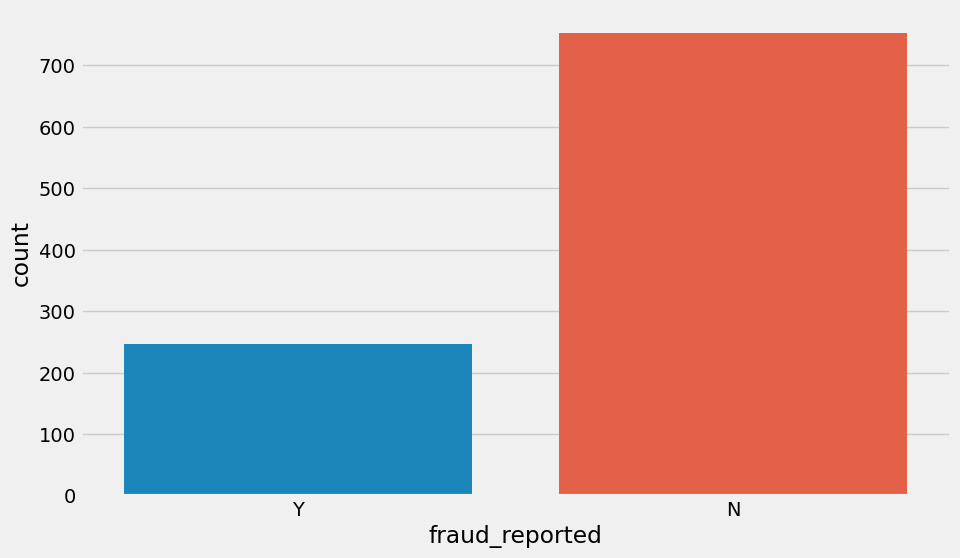

In [73]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

In [75]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64


age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64


policy_number
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: count, Length: 1000, dtype: int64


policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: count, L

In [76]:
#lets fill null values in column 'authorities_contacted'
df['authorities_contacted']=df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])

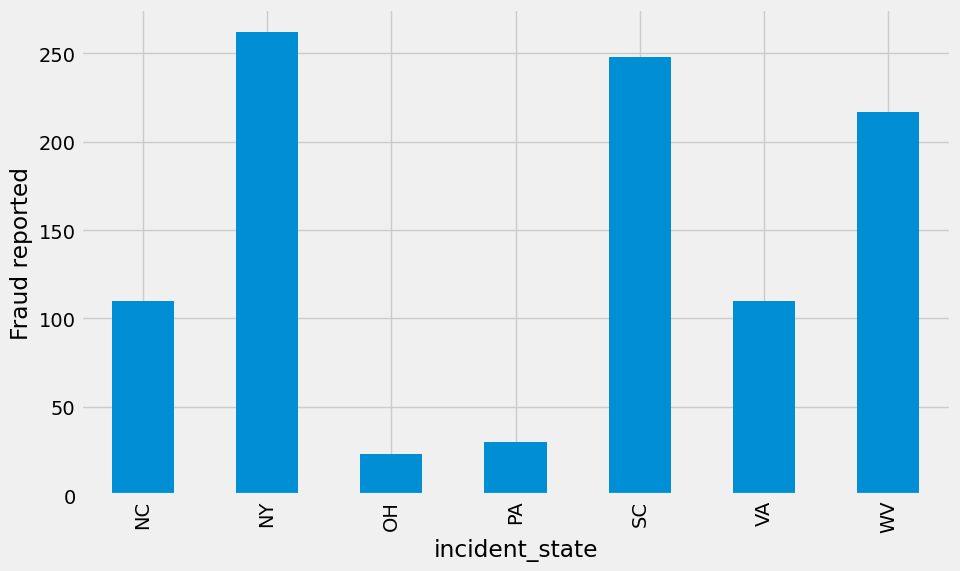

In [77]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

# our target variable is object type lets convert it in int

In [78]:
# i am using labelencoder to conert object variable in int
from sklearn.preprocessing import LabelEncoder

In [79]:
lb=LabelEncoder()
df['fraud_reported']=lb.fit_transform(df['fraud_reported'])

<Axes: >

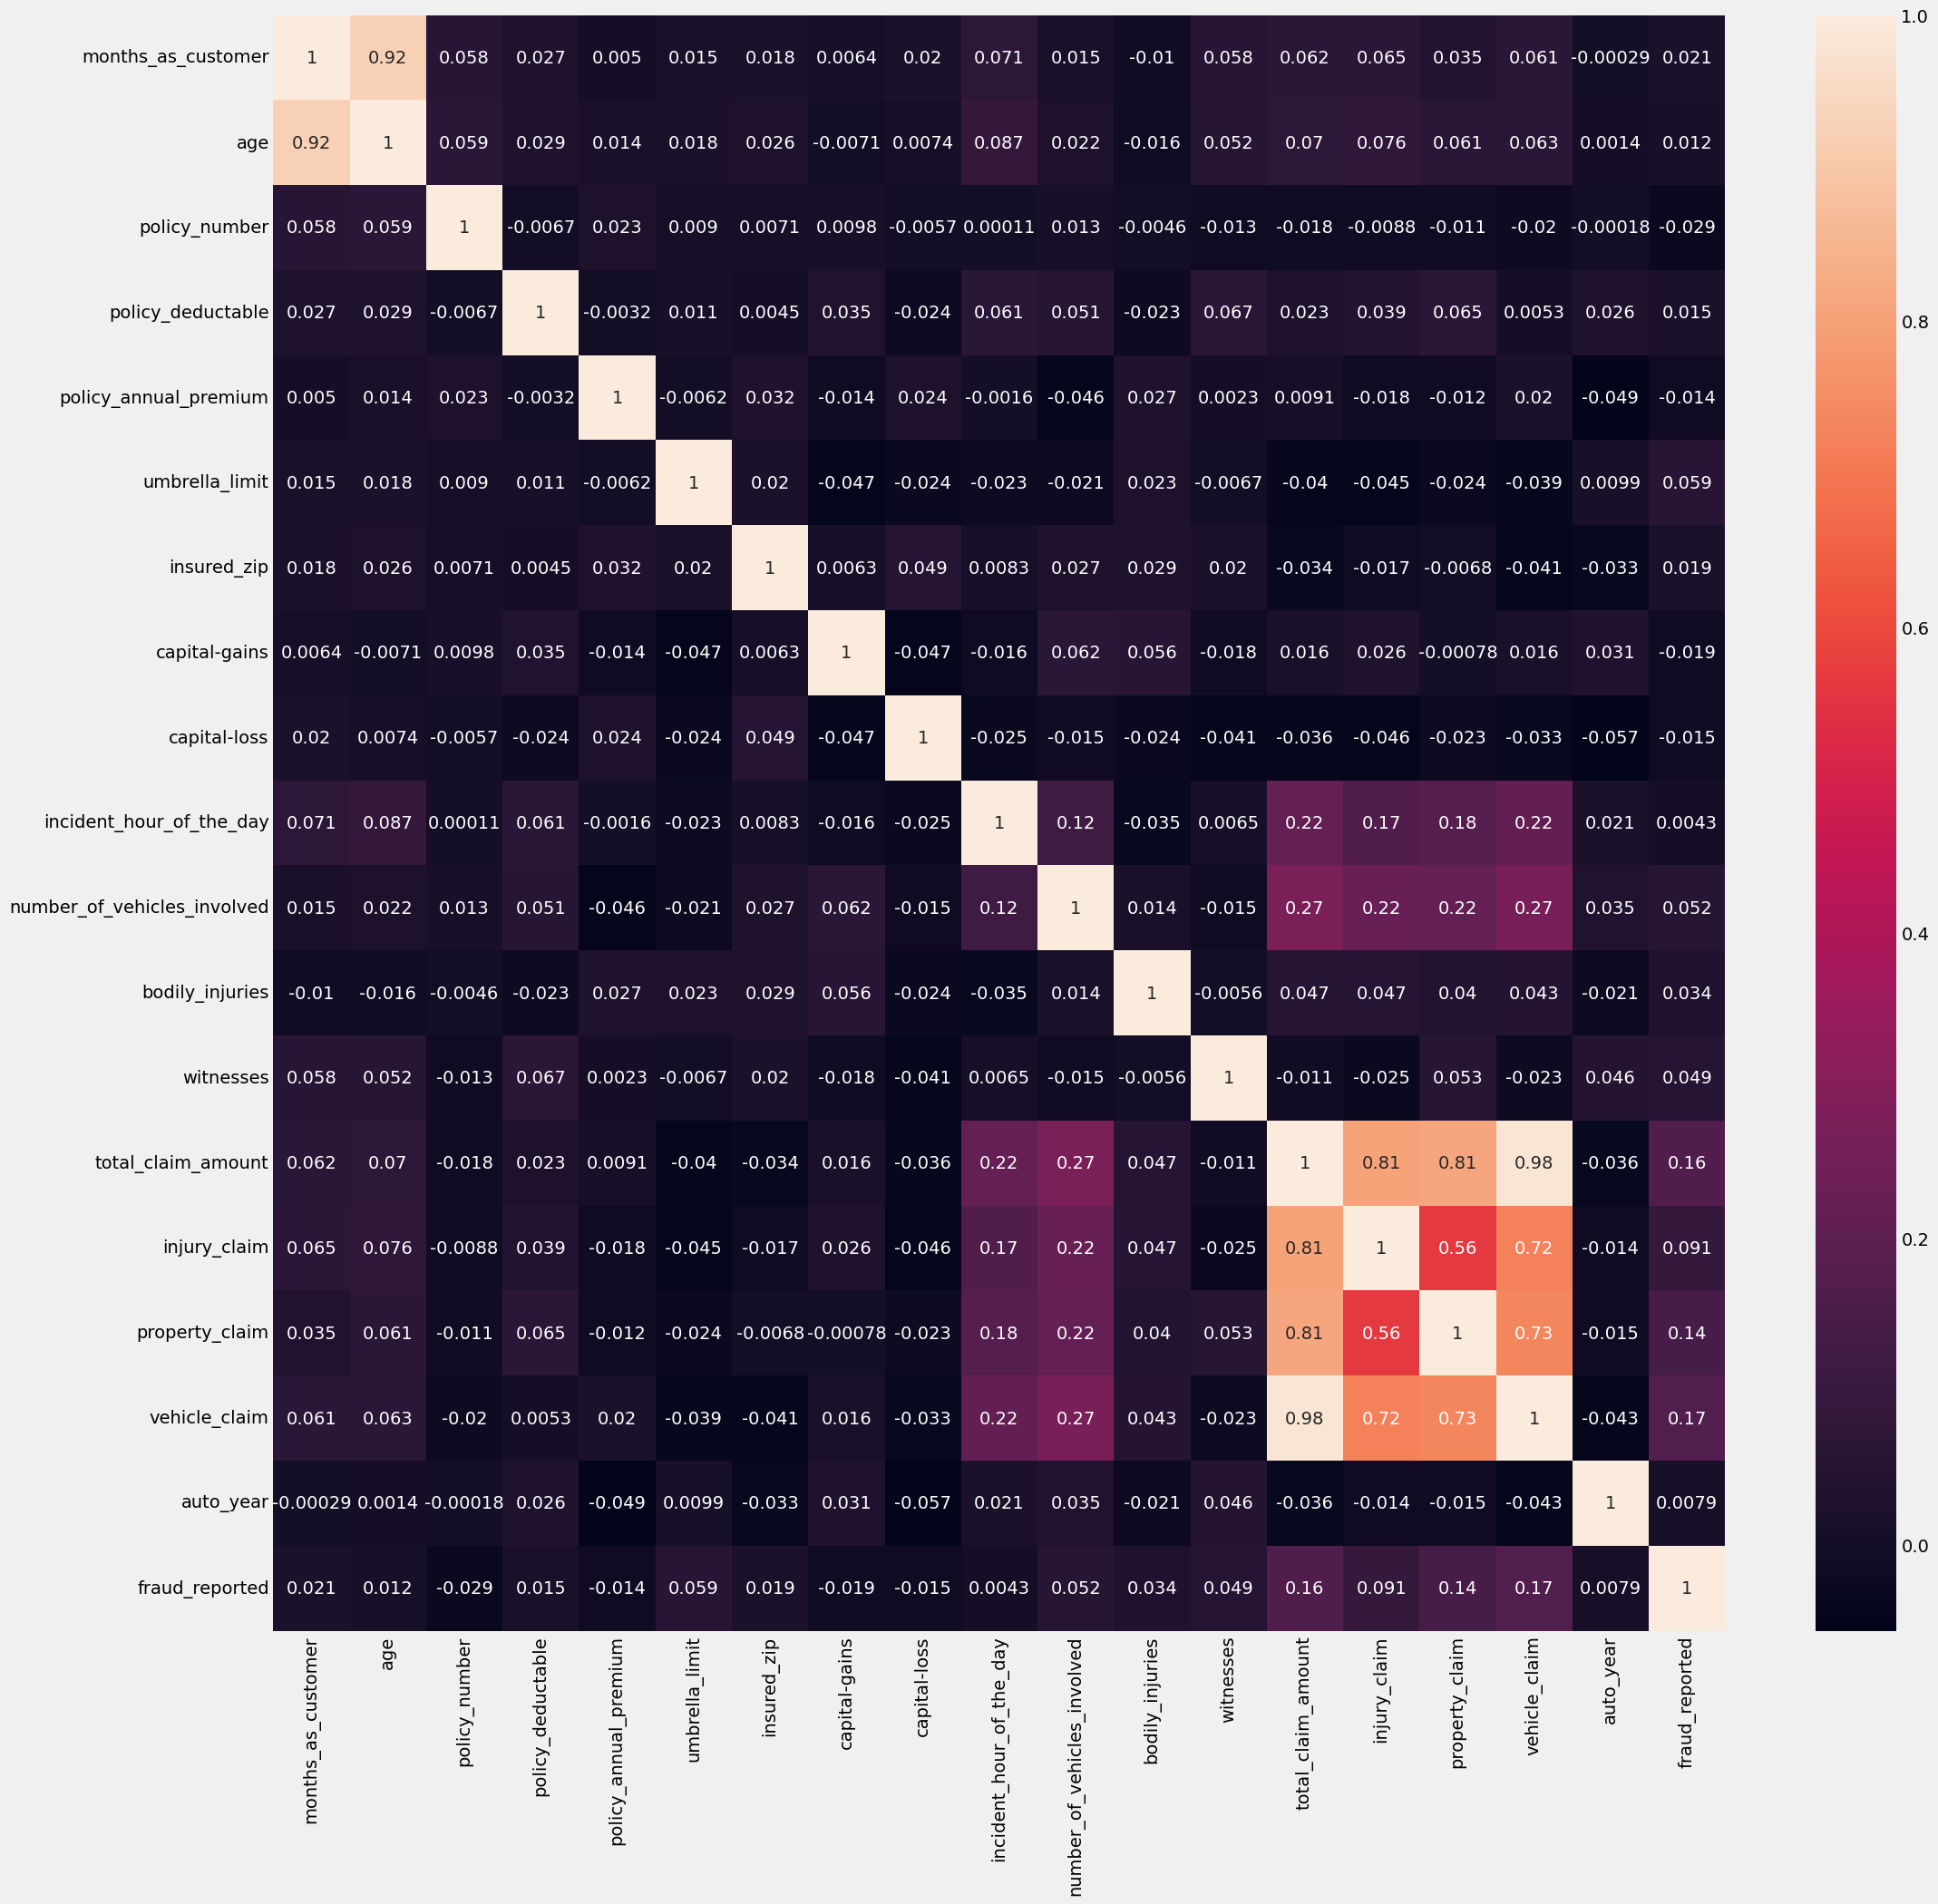

In [80]:
fig = plt.figure(figsize=(23,22))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [81]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,0
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,0
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,0
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,0


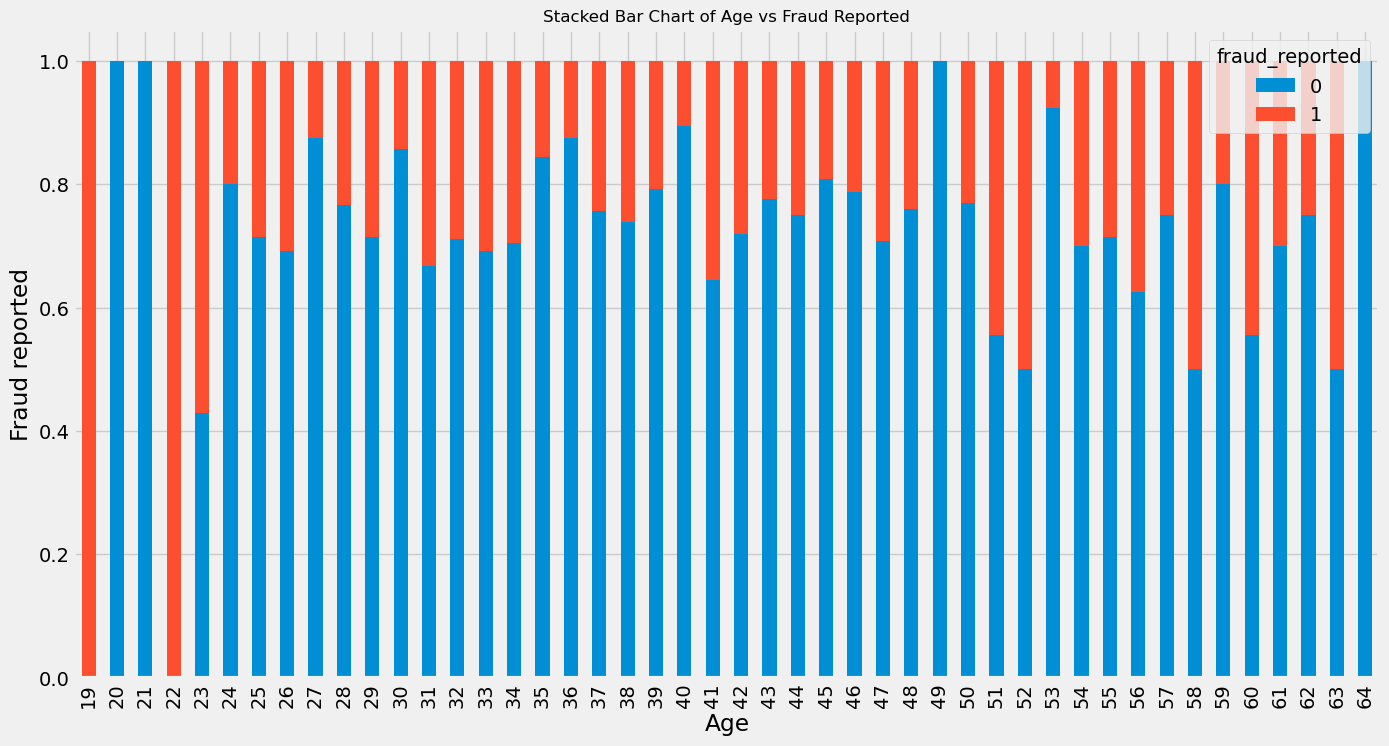

In [82]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.age, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs Fraud Reported', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Fraud reported')
plt.show()


From above plot, it is obvious that, age is an important predictor for fraud reported. Age between 19-23 shows substantial number od fraud report.

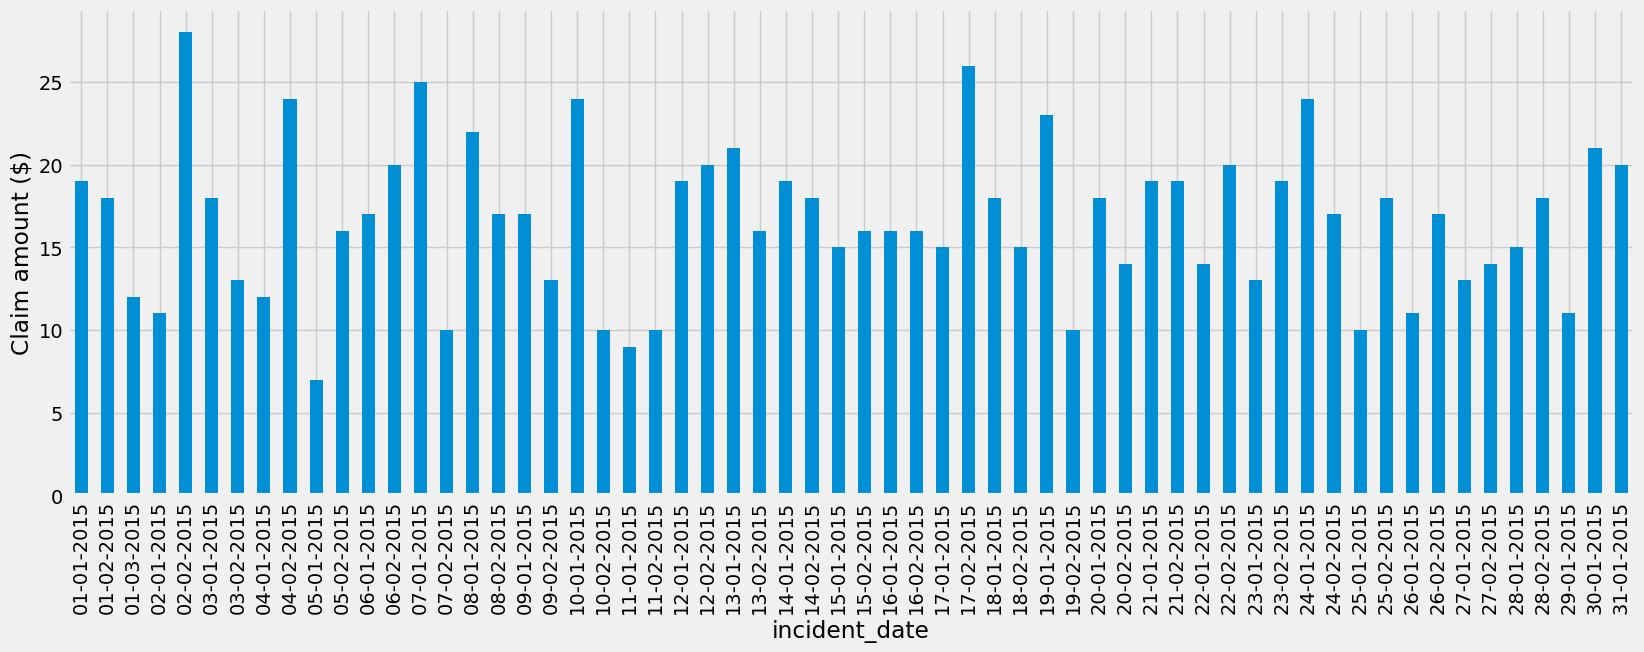

In [83]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

We see that, all the cases in above plot are for the months of January and February 2015

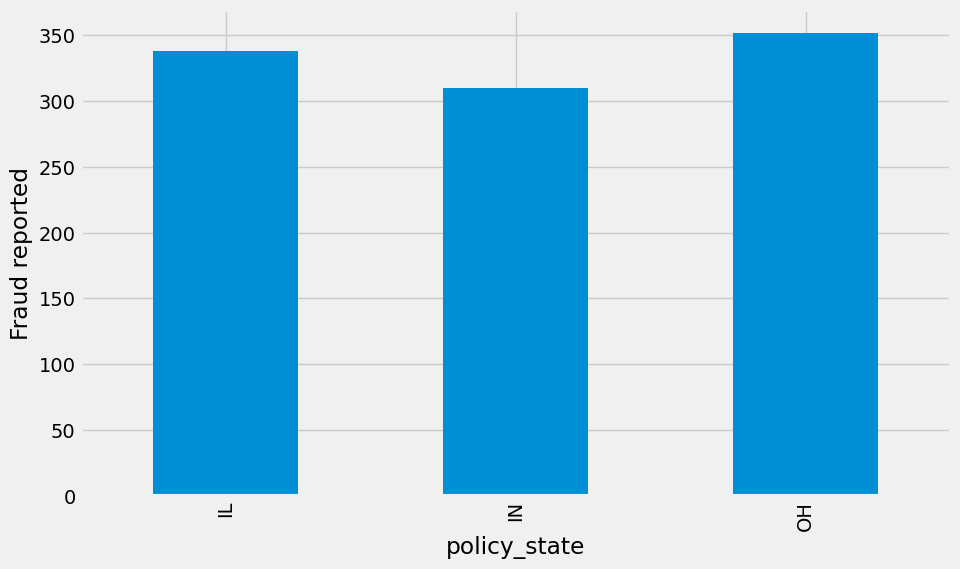

In [84]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

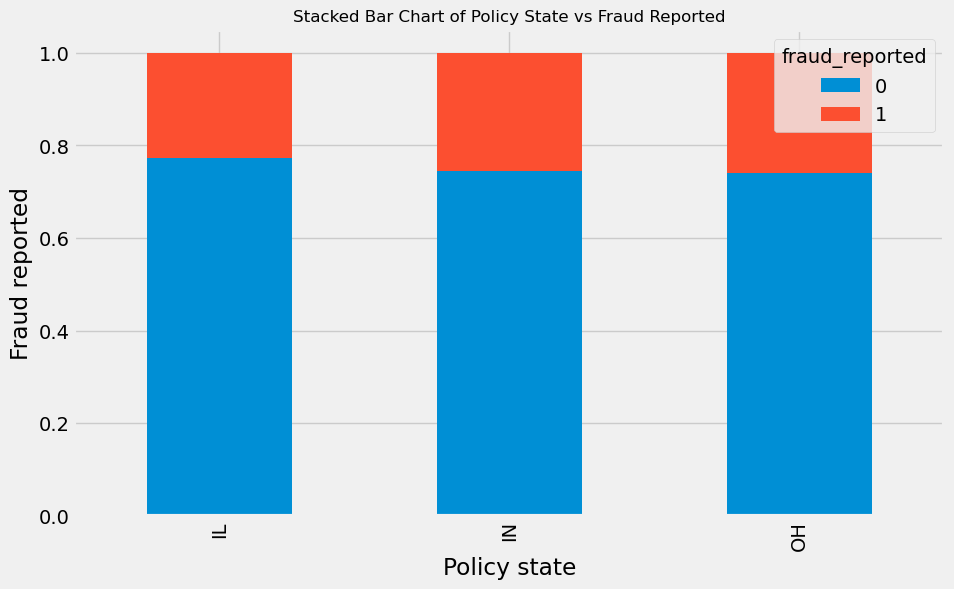

In [85]:
plt.rcParams['figure.figsize'] = [10, 6]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.policy_state, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Policy State vs Fraud Reported', fontsize=12)
plt.xlabel('Policy state')
plt.ylabel('Fraud reported')
plt.show()

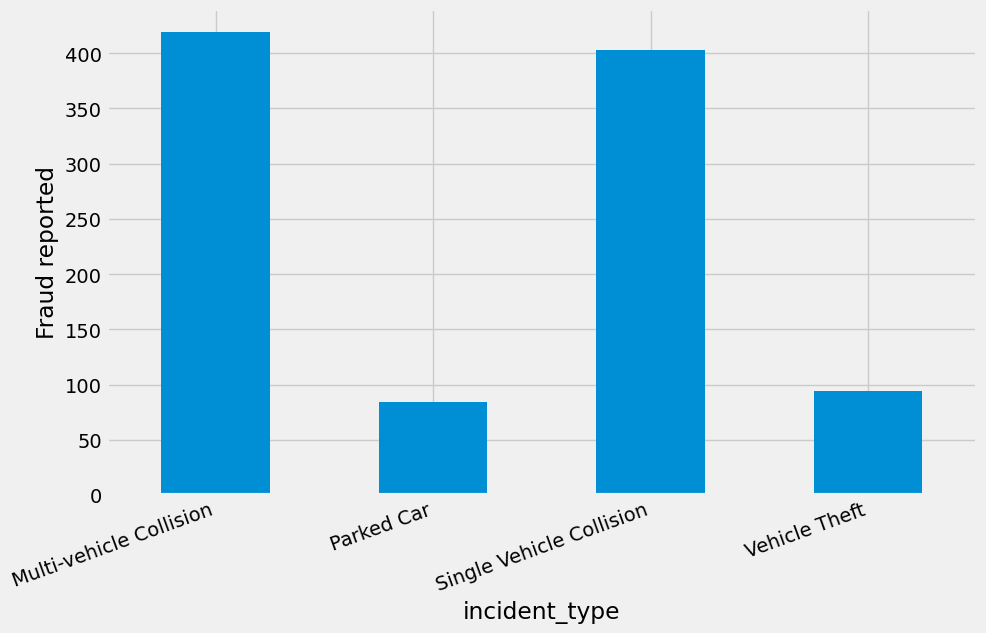

In [86]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

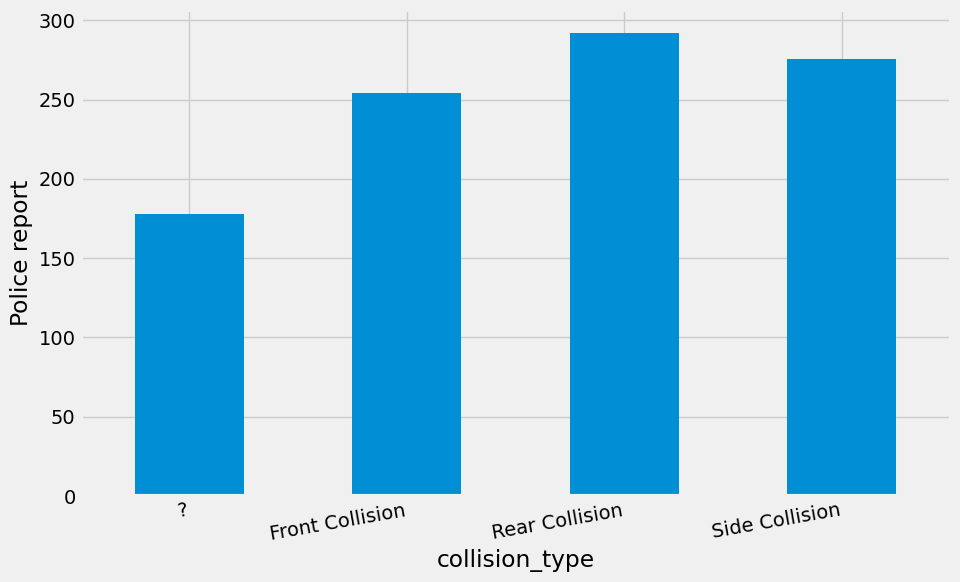

In [87]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

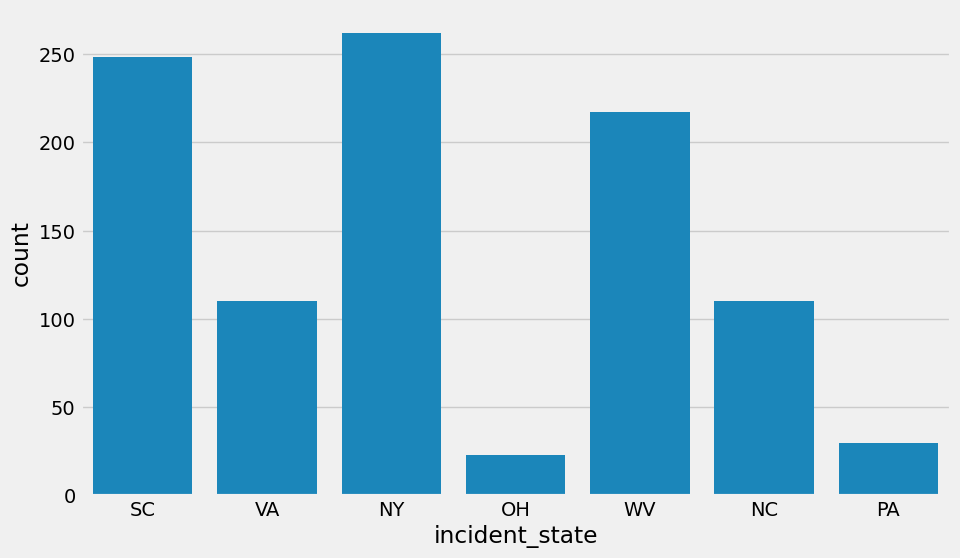

In [88]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=df)

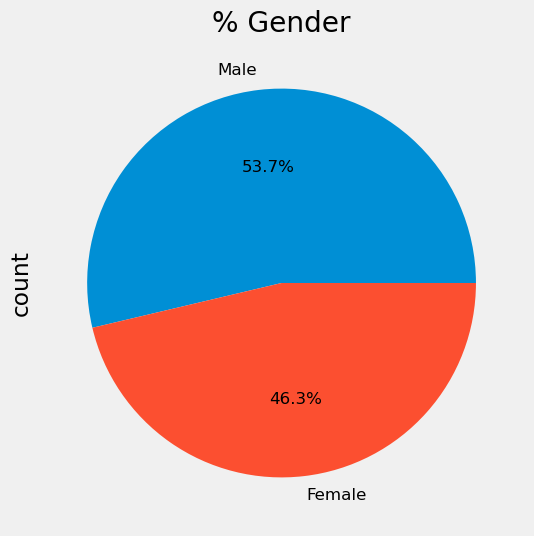

In [89]:
ax = (df['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()

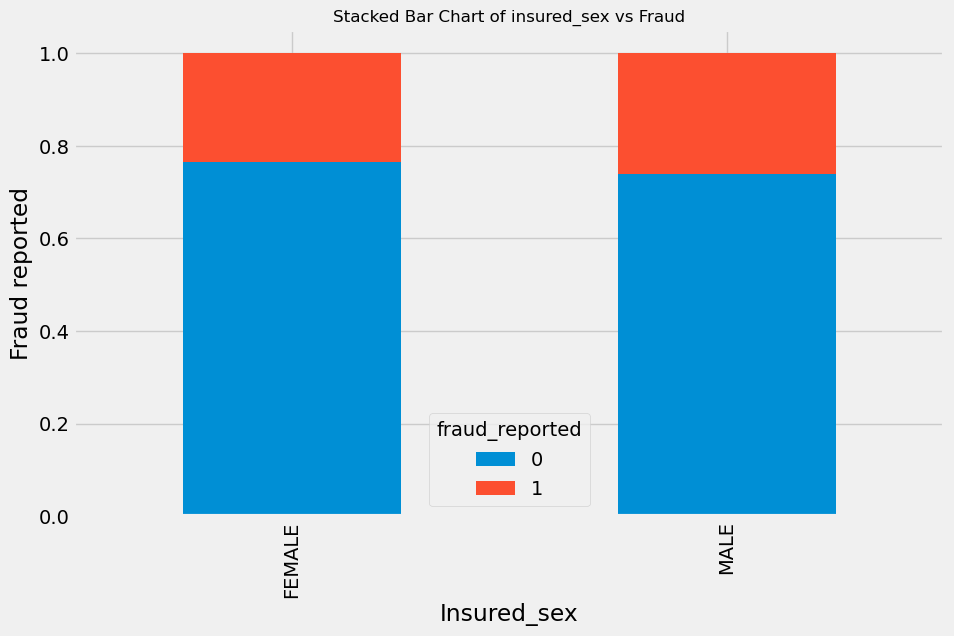

In [90]:
table=pd.crosstab(df.insured_sex, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured_sex vs Fraud', fontsize=12)
plt.xlabel('Insured_sex')
plt.ylabel('Fraud reported')
plt.show()

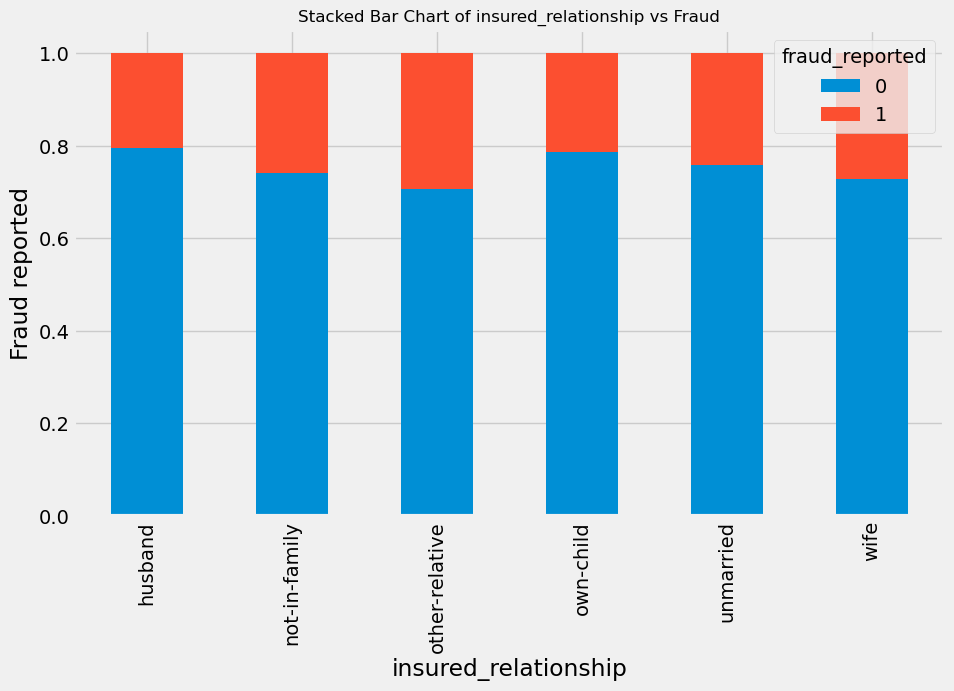

In [91]:
table=pd.crosstab(df.insured_relationship, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured_relationship vs Fraud', fontsize=12)
plt.xlabel('insured_relationship')
plt.ylabel('Fraud reported')
plt.show()

In [92]:
df.select_dtypes(include=['object']).columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')

In [93]:
# to do analysis need to convert object in numbers i am using ordinal encoder here
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,3,1.0,34650,7700,3850,23100,4.0,30.0,2007,0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,2,1.0,63400,6340,6340,50720,3.0,34.0,2014,1
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1,1.0,6500,1300,650,4550,0.0,31.0,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487.0,2.0,2.0,1000,1310.80,0,431289,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0
996,285,41,186934,129.0,0.0,0.0,1000,1436.79,0,608177,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0
997,130,34,918516,509.0,2.0,1.0,500,1383.49,3000000,442797,...,3,2.0,67500,7500,7500,52500,11.0,19.0,1996,0
998,458,62,533940,573.0,0.0,2.0,2000,1356.92,5000000,441714,...,1,2.0,46980,5220,5220,36540,1.0,5.0,1998,0


In [94]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


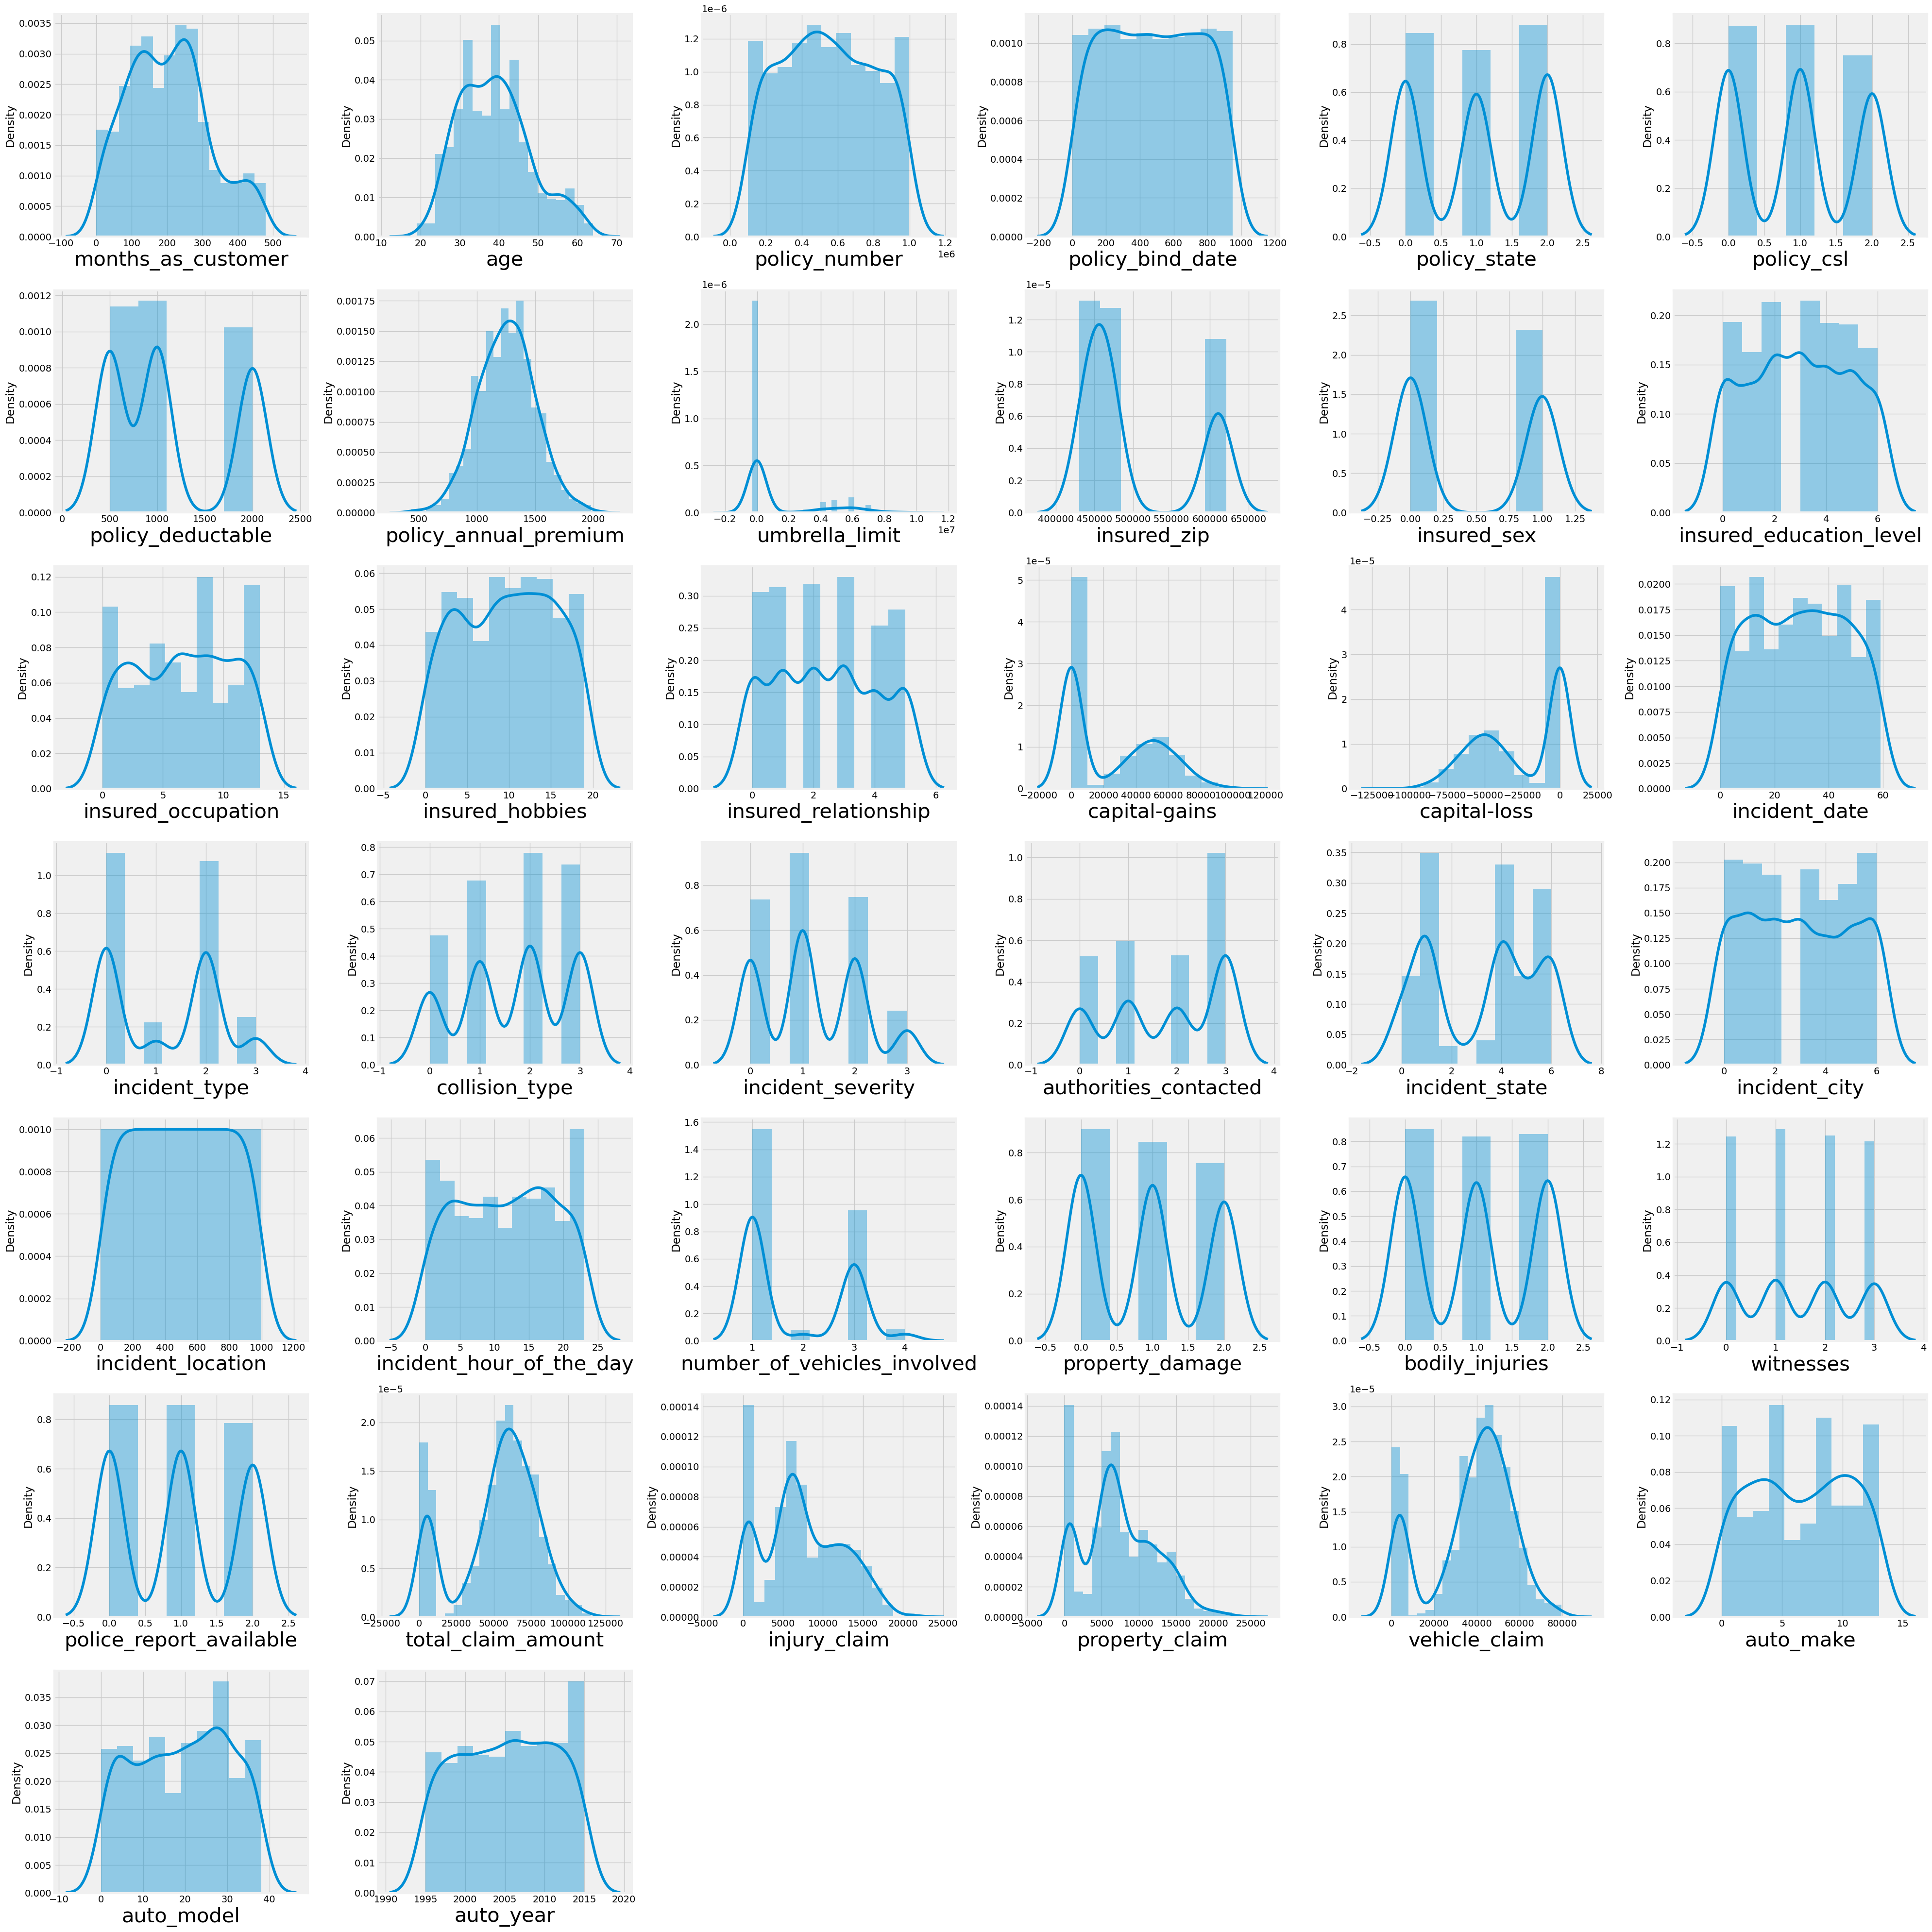

In [95]:
#lets check data distribution
plt.figure(figsize=(40,40), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=38:
        ax = plt.subplot(7,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=30)
    plotnumber+=1
plt.tight_layout()

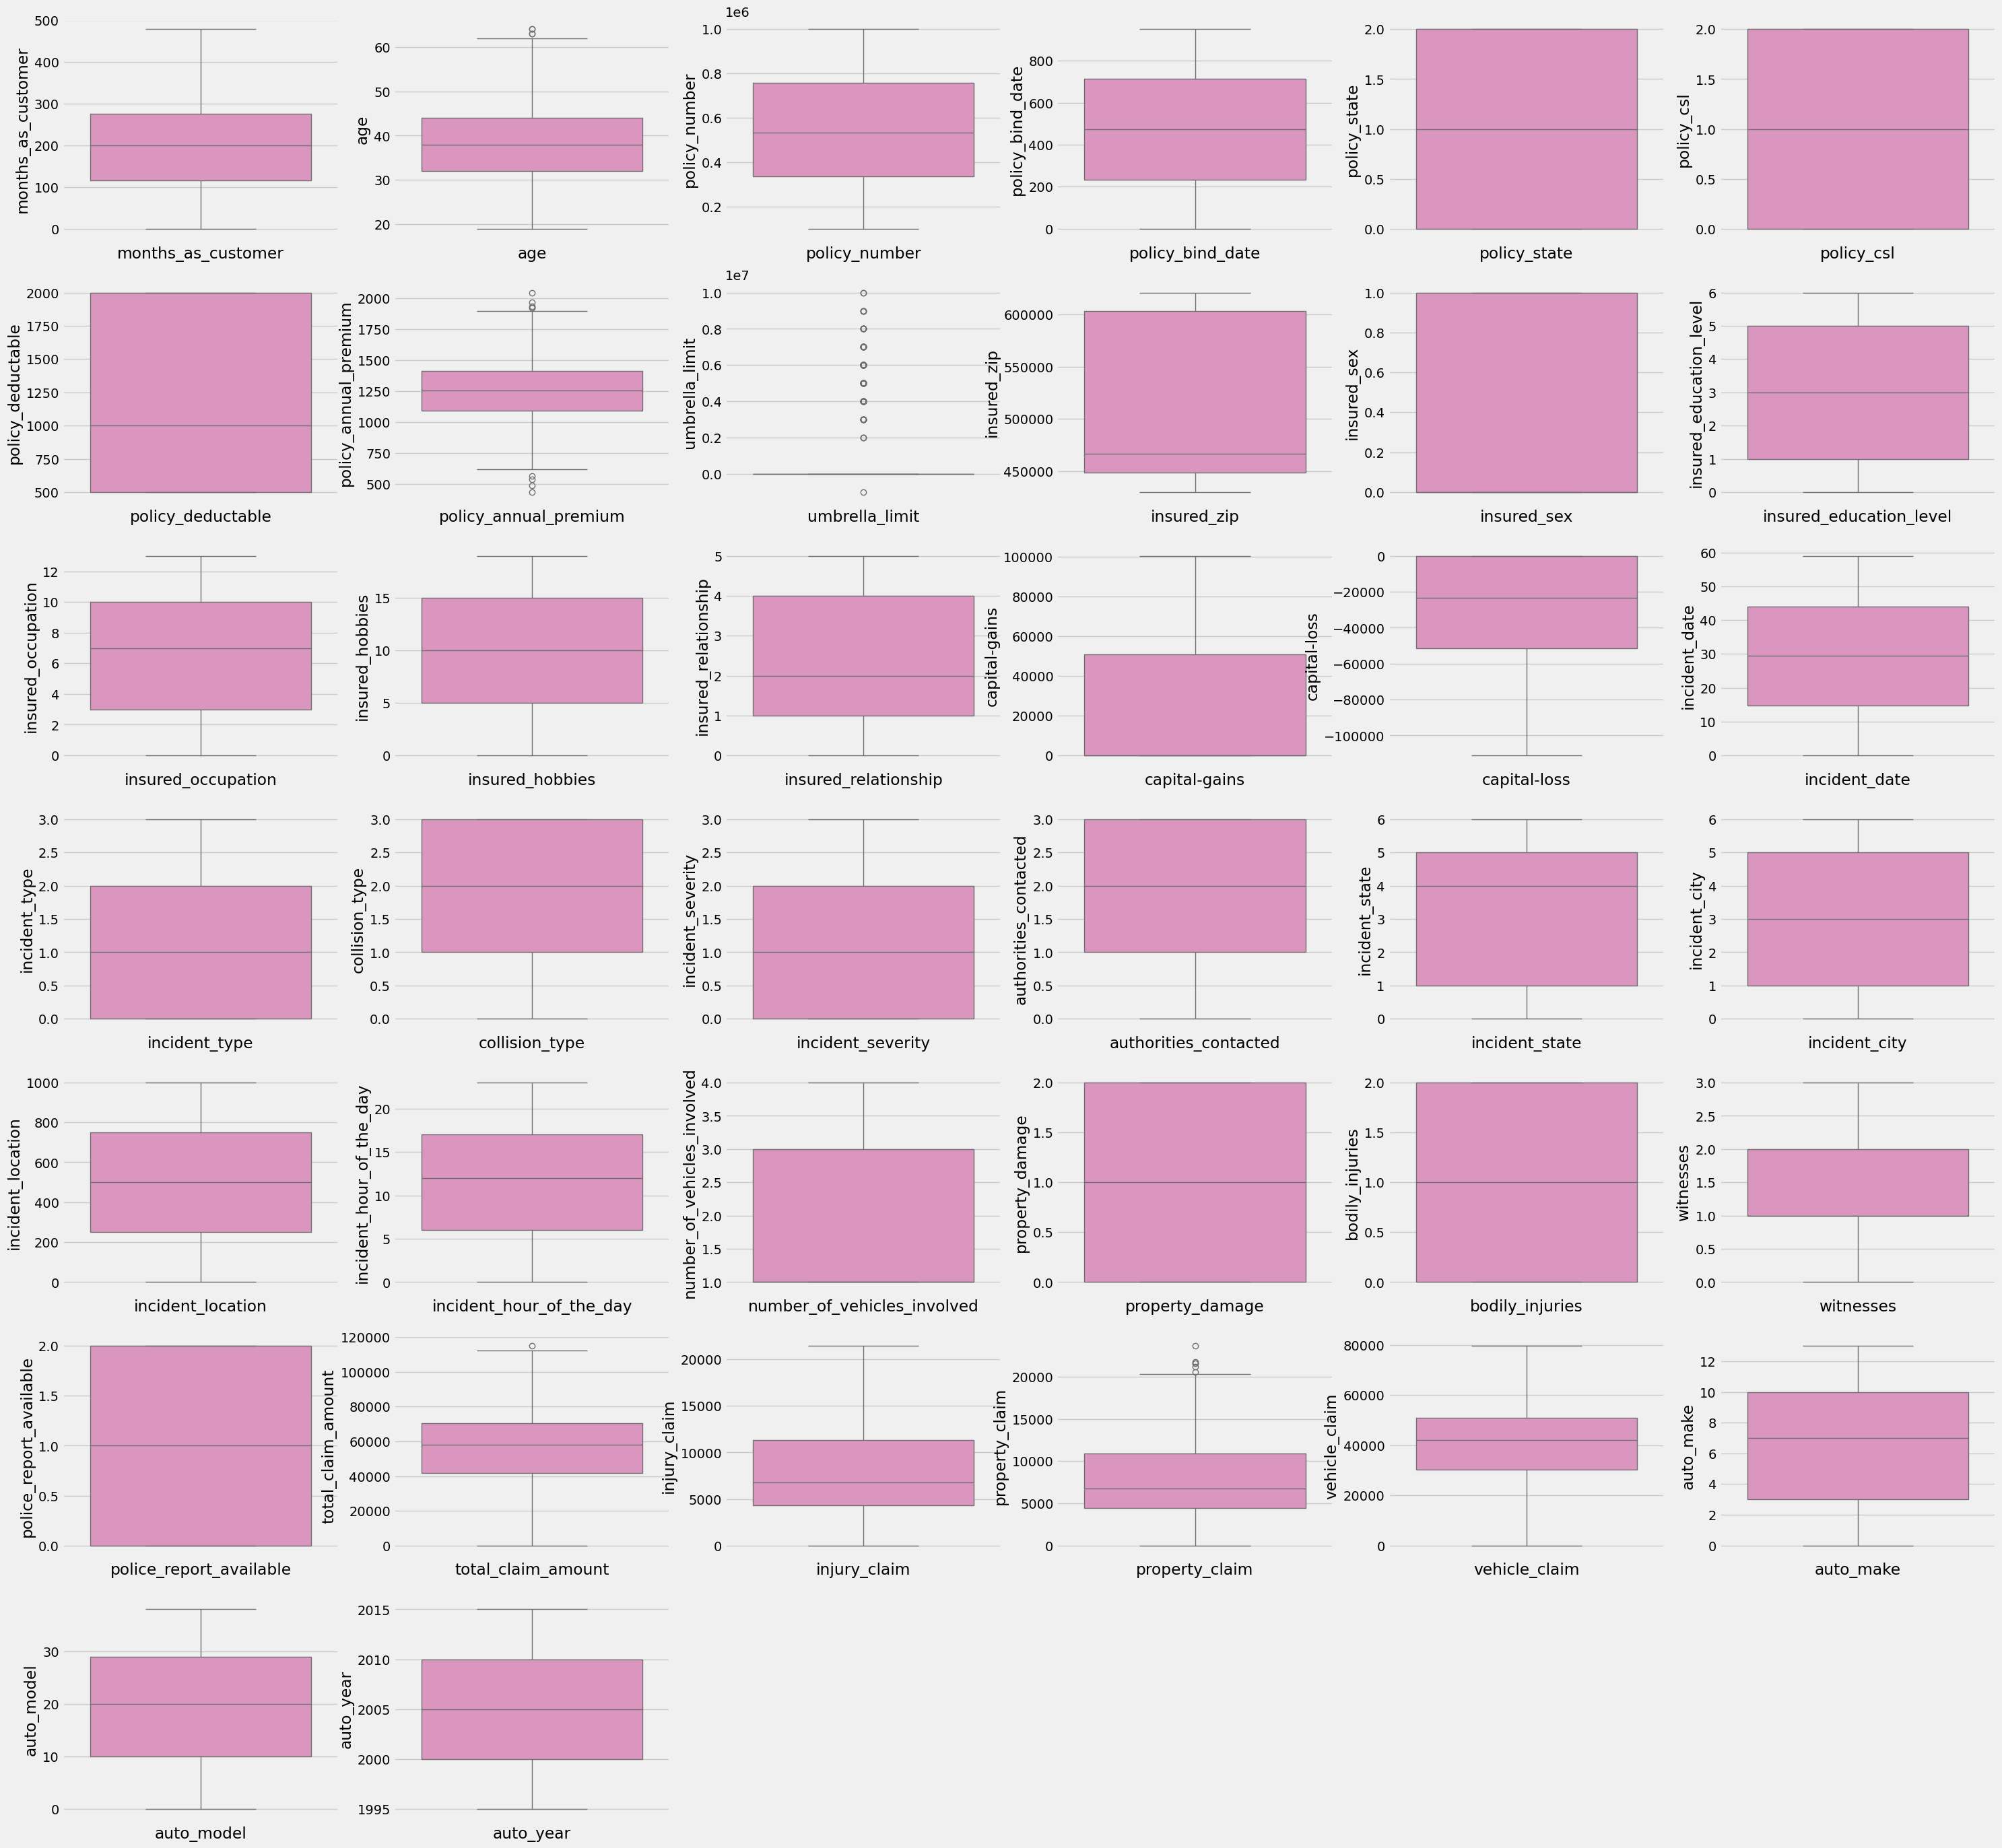

In [96]:
plt.figure(figsize=(33,33))
n=1
for i in df:
    if n<=38:
        plt.subplot(7,6,n)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i)
    n+=1
plt.show()

there is not much outliers data is well distributed

In [97]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.301862
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


In [98]:
#assigning feature and target variable
x = df.drop('fraud_reported',axis=1)
y = df['fraud_reported']
print("feature dimension=",x.shape)
print('label Dimension',y.shape)

feature dimension= (1000, 38)
label Dimension (1000,)


In [99]:
#standard scaling of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.078140,0.990836,-0.095953,0.209500,1.187173,0.060937,-0.222383,0.616705,-0.479476,-0.489529,...,0.009759,0.461838,1.270313,0.714257,-0.189283,1.165505,0.749653,0.856466,-1.645743,-0.183440
1,0.208995,0.334073,-0.791527,1.259397,-0.016856,0.060937,1.412784,-0.242521,1.697980,-0.461008,...,-1.210174,-1.338700,-1.198712,-1.807312,-1.363822,-1.372696,-1.823346,0.360539,-0.657470,0.315491
2,-0.608002,-1.088913,0.550566,-1.047470,1.187173,-1.182668,1.412784,0.642233,1.697980,-0.984885,...,1.229693,1.362107,0.035801,-0.686362,0.054644,-0.736072,-0.785565,-0.631315,0.959702,0.315491
3,0.452355,0.224613,-1.239334,1.059589,-1.220886,0.060937,1.412784,0.652886,2.133471,1.491682,...,0.009759,0.461838,0.035801,0.403135,-0.224130,-0.219722,0.677607,-0.879279,1.319074,1.479664
4,0.208995,0.552994,-0.695834,-1.065634,-1.220886,1.304542,-0.222383,1.341980,2.133471,1.527808,...,-1.210174,-0.438431,0.035801,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545,0.648112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,1.539740,0.046021,1.187173,1.304542,-0.222383,0.222884,-0.479476,-0.975717,...,-1.210174,-0.438431,-1.198712,1.305049,2.051155,0.273817,1.224309,-0.135388,-1.196528,0.149180
996,0.704407,0.224613,-1.398429,-1.254543,-1.220886,-1.182668,-0.222383,0.739141,-0.479476,1.492519,...,1.229693,1.362107,-1.198712,2.111466,2.182342,2.214794,1.821868,1.600357,0.780016,1.645974
997,-0.642767,-0.541611,1.448920,0.125944,1.187173,0.060937,-1.039966,0.520739,0.826998,-0.815138,...,1.229693,1.362107,1.270313,0.558507,0.013648,0.020826,0.771902,1.104430,-0.028570,-1.513924
998,2.208028,2.523284,-0.047867,0.358447,-1.220886,1.304542,1.412784,0.411866,1.697980,-0.830250,...,-1.210174,-0.438431,1.270313,-0.219110,-0.453708,-0.451976,-0.073580,-1.375206,-1.286371,-1.181303


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS =0
for i in range(1,110):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)# training model
    pred = RFR.predict(x_test)# predicting y test
    acc = accuracy_score(y_test,pred)# give accuracy score
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i# setting best random state for higher accuracy
print('Best accuracy is',maxAccu,'at random_state',maxRS)

Best accuracy is 0.828 at random_state 16


In [101]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
# creating one function for various classification model
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=16)
    model.fit(x_train,y_train)# Training the model
    pred = model.predict(x_test)# predicting y test
    acc = accuracy_score(y_test,pred)# give accuracy score
    print("accuracy score",acc)
    print("classification_report",classification_report(y_test,pred))
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [102]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = maxRS)

In [103]:
# Support Vector Classifier
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=52)
classify(model,x,y)

accuracy score 0.808
classification_report               precision    recall  f1-score   support

           0       0.83      0.96      0.89       203
           1       0.47      0.15      0.23        47

    accuracy                           0.81       250
   macro avg       0.65      0.55      0.56       250
weighted avg       0.76      0.81      0.77       250

Cross Validation Score: 0.7469999999999999

Accuracy Score - Cross Validation Score is 0.061000000000000165


In [104]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model,x,y)

accuracy score 0.808
classification_report               precision    recall  f1-score   support

           0       0.84      0.94      0.89       203
           1       0.48      0.23      0.31        47

    accuracy                           0.81       250
   macro avg       0.66      0.59      0.60       250
weighted avg       0.77      0.81      0.78       250

Cross Validation Score: 0.744

Accuracy Score - Cross Validation Score is 0.06400000000000006


In [105]:
#GradientBoostingClassifier
model=GradientBoostingClassifier()
classify(model,x,y)

accuracy score 0.844
classification_report               precision    recall  f1-score   support

           0       0.94      0.87      0.90       203
           1       0.56      0.74      0.64        47

    accuracy                           0.84       250
   macro avg       0.75      0.81      0.77       250
weighted avg       0.87      0.84      0.85       250

Cross Validation Score: 0.8310000000000001

Accuracy Score - Cross Validation Score is 0.0129999999999999


In [106]:
#bagging
model=BaggingClassifier()
classify(model,x,y)

accuracy score 0.836
classification_report               precision    recall  f1-score   support

           0       0.93      0.86      0.90       203
           1       0.55      0.72      0.62        47

    accuracy                           0.84       250
   macro avg       0.74      0.79      0.76       250
weighted avg       0.86      0.84      0.84       250

Cross Validation Score: 0.8210000000000001

Accuracy Score - Cross Validation Score is 0.014999999999999902


In [107]:
#AdaBoostClassifier
model=AdaBoostClassifier()
classify(model,x,y)

accuracy score 0.836
classification_report               precision    recall  f1-score   support

           0       0.88      0.93      0.90       203
           1       0.58      0.45      0.51        47

    accuracy                           0.84       250
   macro avg       0.73      0.69      0.70       250
weighted avg       0.82      0.84      0.83       250

Cross Validation Score: 0.7859999999999999

Accuracy Score - Cross Validation Score is 0.050000000000000044


In [108]:
model=RandomForestClassifier(max_depth=15, random_state=41)
classify(model,x,y)

accuracy score 0.812
classification_report               precision    recall  f1-score   support

           0       0.86      0.91      0.89       203
           1       0.50      0.38      0.43        47

    accuracy                           0.81       250
   macro avg       0.68      0.65      0.66       250
weighted avg       0.80      0.81      0.80       250

Cross Validation Score: 0.7779999999999999

Accuracy Score - Cross Validation Score is 0.03400000000000014


# gradientboosting is best performing 

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
parameters = {'n_estimators':[1, 2, 3, 4, 5],'learning_rate':[0.1,0.2]}
gscv = GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2],
                         'n_estimators': [1, 2, 3, 4, 5]})

In [119]:
gscv.best_params_

{'learning_rate': 0.2, 'n_estimators': 5}

In [122]:
Final_Model =GradientBoostingClassifier(n_estimators=5,learning_rate=0.2,max_depth=4)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 88.0


In [123]:
import pickle
filename = 'Insurance_Fraud_Detection.pkl'
pickle.dump(Final_Model,open(filename,'wb'))

In [124]:
load_model = pickle.load(open('Insurance_Fraud_Detection.pkl','rb'))
result = load_model.score(x_test,y_test)
print(result*100)

88.0


In [125]:
conclusion = pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=['Predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
Predicted,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
original,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
